# Capstone Projects Ideas

## 1. Predict Energy Requirement based on Building Attributes

Predict the heating and cooling load for a building based on its attributes such as glazing area, compactness, surface area, wall height etc. The data was generated using simulation software 'Ecotect'. This software is owned by Autodesk.

[Link](http://archive.ics.uci.edu/ml/datasets/Energy+efficiency)

## 2. Predict Breast Cancer diagnosis using biopsy data

Predict the diagnosis (i.e. malignant or benign) of biopsy using the cell attributes from biopsy. The attributes are discrete and have only certain values.

[Link](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29)

## 3. Predict Epileptic Seizures

Predict epileptic seizure from time series EEG data. 

Time series data containing EEG readings. The EEG data are sampled at 178 datapoints per sec. At the end of each second, the patient's state is recorded in numbers from 1 to 5. Number 1 meaning the patient is having a seizure.

[Link](http://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition)


# Select Project number 2 - Predict Breast Cancer diagnosis using biopsy data.


# Code to Build Random Forest Classifier

## 1. Data Wrangling

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import ExcelWriter
from pandas import ExcelFile
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from IPython.display import display


# Read Data & Remove rows with NA's
df_with_na = pd.read_excel('01 Data/01 Breast Cancer Data in Excel.xlsx', sheetname='Sheet1', header=0)
rows_with_na = []

# Dropna function did not work on this dataframe. So the code below was used.
for i in range(df_with_na.shape[0]):
    if(sum(np.isnan(df_with_na.iloc[i,:]))>0):
        rows_with_na.append(i)

df = df_with_na.drop(rows_with_na)

df.Class[df.Class==2] = 0
df.Class[df.Class==4] = 1

X = df.iloc[:,1:10] # First column is ID and is excluded from the analysis.
y = df.iloc[:,10]

# Inspect Input Variables
input_variables = df.iloc[:,1:11]
print('Statistics on the Data')
display(input_variables.describe())
print('Frequency Distribution of the Tumor Classes, 0 - Benign, 1 - Malignant')
print(input_variables['Class'].value_counts())


Statistics on the Data


/Users/Murali/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Murali/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Clump Thickness,Uniformity of Cell Sizes,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


Frequency Distribution of the Tumor Classes, 0 - Benign, 1 - Malignant
0    444
1    239
Name: Class, dtype: int64


# 2. Data Storytelling

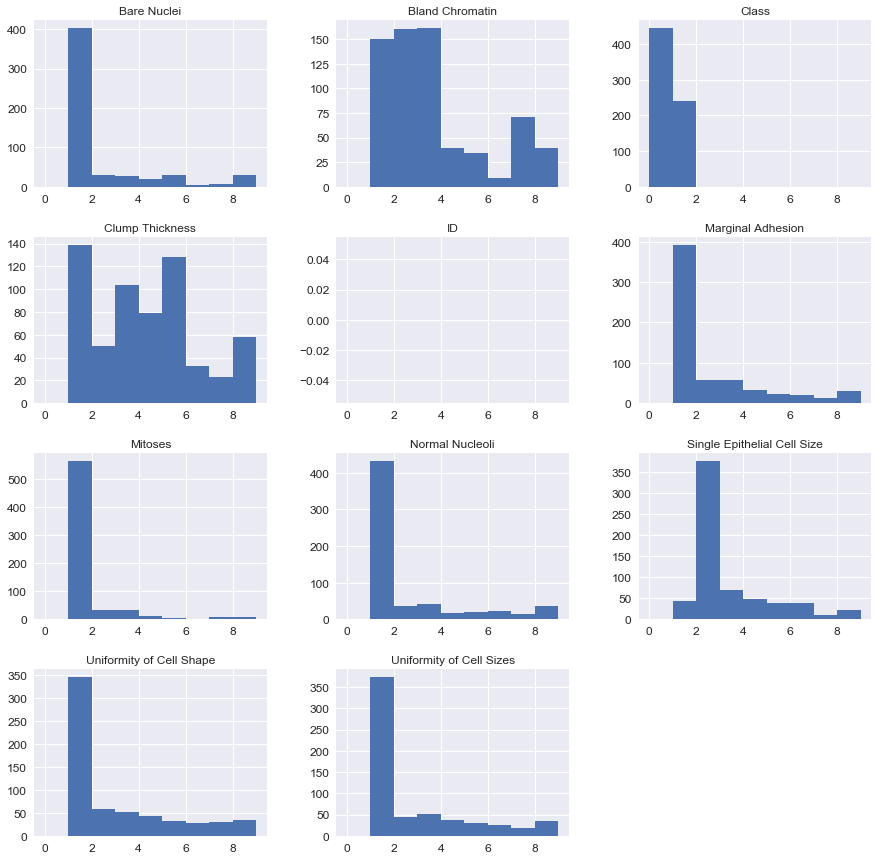

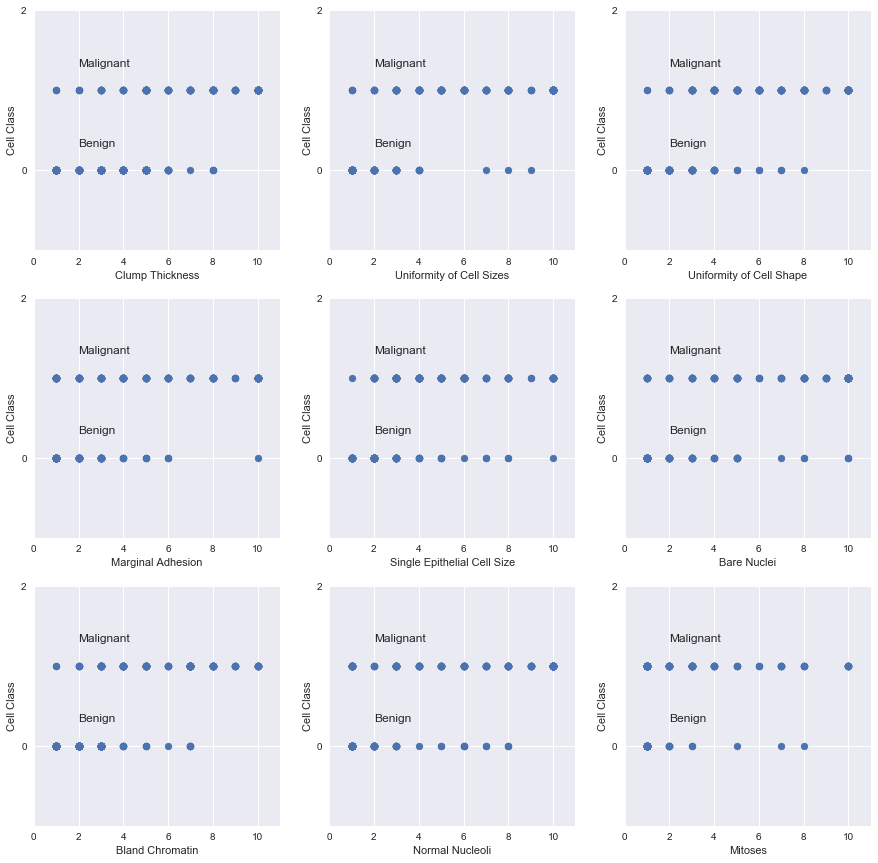

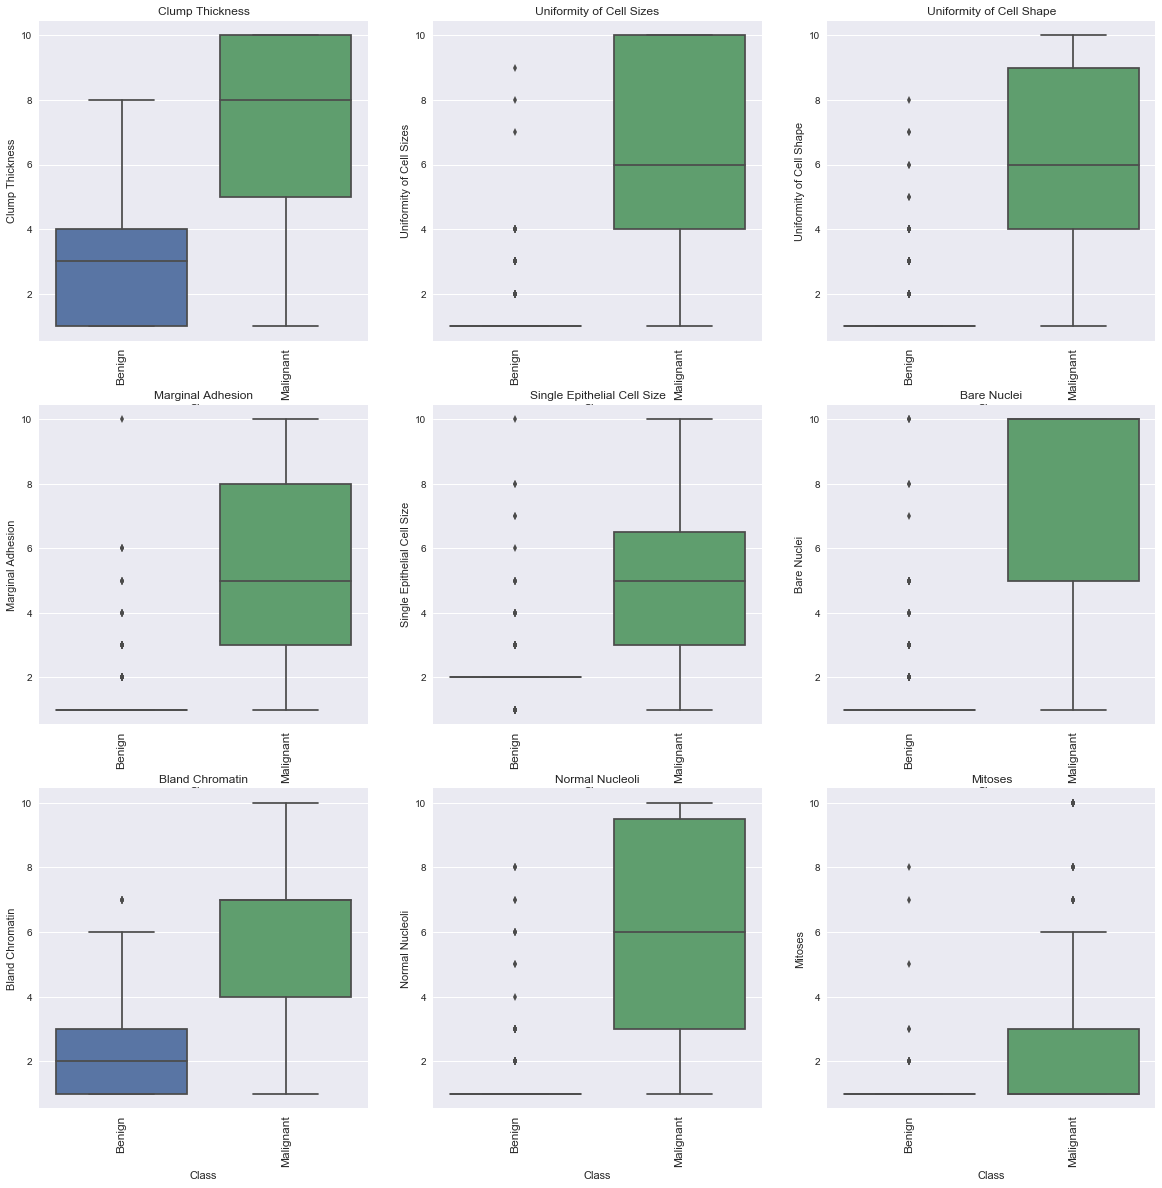

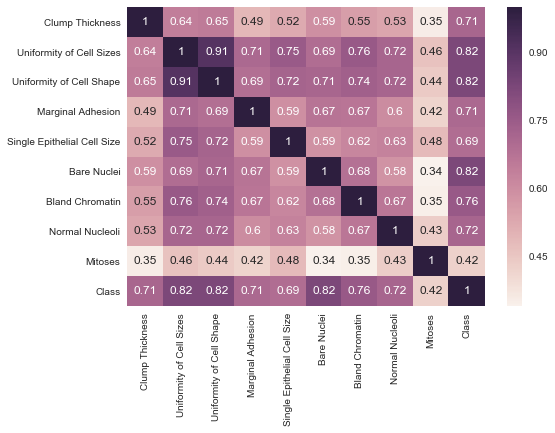

In [12]:
def plot_scatter(x, y, x_label, y_label, plotno):
    plt.subplot(3,3,plotno)
    plt.scatter(x, y)
    plt.xlabel(x_label)
    plt.ylabel('Cell Class')
    plt.annotate('Malignant',xy=(2, 1.3))
    plt.annotate('Benign',xy=(2, 0.3))
    plt.yticks([0, 2])
    plt.axis([0, 11, -1, 2])
    
# Generate boxplots of all columns
df.hist(bins=range(10), figsize=(15, 15), xlabelsize = 12, ylabelsize = 12)
plt.show()

#print(df.columns)
plt.figure(figsize=(15,15))
plotting = [plot_scatter(df.iloc[:,k], df.iloc[:,10], df.columns[k], df.columns[10], k) for k in range(1,10)]
plt.show()

# Plot the variation in the input variables by Tumor Class
plt.figure(figsize=(20,20))
for i in range(1,10):
    plt.subplot(3,3,i)
    bxplot = sns.boxplot(x='Class', y=df.columns[i], data=df)
    bxplot.set_xticklabels(['Benign', 'Malignant'], rotation=90, fontsize=12)
    plt.title(df.columns[i], fontsize=12)
plt.show()

# Look at the correlation in the predictor variables
corr = df.iloc[:,1:11].corr()
sns.heatmap(corr, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)
plt.show()

# 3 Required Functions & Parameters Declarations

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

def display_matrix(data, col_names, index_names):
    """Converts Matrix into data frame and display's it in nice format."""
    df_to_display = pd.DataFrame(data, index=index_names, columns=col_names)
    display(df_to_display)

def model_train_test(X, y, test_frac, seed, func, **kwargs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_frac, random_state=seed)
    func.fit(X_train,y_train)
    y_pred = func.predict(X_test)
    confusion_matrix_results = confusion_matrix(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    
    if 'result_print' in kwargs:
        print_flag = kwargs['result_print']
    else:
        print_flag = True
    
    if print_flag:
        print('Confusion Matrix From {0} Model'.format(str(func)))
        cols = ['Actual Benign', 'Actual Malignant']
        inds = ['Predicted Benign', 'Predicted Malignant']
        display(display_matrix(confusion_matrix_results, cols, inds))
        print(f'Accuracy is {format(round(accuracy*100,2))}%')
    
    return accuracy

import statsmodels.api as sm
import statsmodels.formula.api as smf

def statmodel_train_test(X, y, test_frac, seed, **kwargs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_frac, random_state=seed)
    model = sm.Logit(y_train, X_train).fit(disp=0)
    y_pred = model.predict(X_test)
    y_pred_bin = y_pred.copy(deep=True)
    y_pred_bin[y_pred>0.5] = 1
    y_pred_bin[y_pred<=0.5] = 0

    confusion_matrix_results = confusion_matrix(y_test, y_pred_bin)
    accuracy = metrics.accuracy_score(y_test, y_pred_bin)
    if ('conf_matrix_flag' in kwargs):
        if (kwargs['conf_matrix_flag']):
            cols = ['Actual Benign', 'Actual Malignant']
            inds = ['Predicted Benign', 'Predicted Malignant']
            display(display_matrix(confusion_matrix_results, cols, inds))
            print(f'Accuracy is {format(round(accuracy*100,2))}%')
    
    return accuracy

test_frac = 0.1
seed = 101
no_of_runs = 1000

# 4. Building a Model Using Logistic Regression

## 4.1 Building Logistic Regression Model Using Scikit learn

In [14]:
# instantiate the model, using the parameters that minimize regularization
# This is so that the SciKit Learn is comparable to Statsmodel
logreg = LogisticRegression(fit_intercept = False, C = 1e9)
log_accuracy = model_train_test(X, y,test_frac, seed, logreg)


inds = df.columns[1:10]
cols = ['Coefficients from Log Regression']
df_logreg_coeff = pd.DataFrame(np.transpose(logreg.coef_), index=inds, columns=cols)
df_logreg_coeff = df_logreg_coeff.round(2)
display(df_logreg_coeff.sort_values('Coefficients from Log Regression', ascending=False))

Confusion Matrix From LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False) Model


,Actual Benign,Actual Malignant
Predicted Benign,41,6
Predicted Malignant,3,19


None

Accuracy is 86.96%


,Coefficients from Log Regression
Uniformity of Cell Sizes,0.94
Bare Nuclei,0.49
Normal Nucleoli,0.36
Uniformity of Cell Shape,0.18
Marginal Adhesion,0.18
Mitoses,-0.25
Clump Thickness,-0.32
Bland Chromatin,-0.55
Single Epithelial Cell Size,-0.79


## 4.2 Building Logistic Regression Model Using StatsModel

In [15]:
log_accuracy = statmodel_train_test(X, y, test_frac, seed, conf_matrix_flag=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_frac, random_state=seed)
model = sm.Logit(y_train, X_train).fit()
model.summary()


,Actual Benign,Actual Malignant
Predicted Benign,41,6
Predicted Malignant,3,19


None

Accuracy is 86.96%
Optimization terminated successfully.
         Current function value: 0.388494
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Sat, 19 Jan 2019   Pseudo R-squ.:                  0.4019
Time:                        07:47:00   Log-Likelihood:                -238.54
converged:                       True   LL-Null:                       -398.82
                                        LLR p-value:                 1.719e-64
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Clump Thickness                -0.3225      0.059     -5.445      0.000      -0.439      -0.206
Uniformity of Cell Sizes        0.9437      0.139      6.809      0.000       0.672       1.215
Uniformity of Cell Shape        0.1804      0.112      1.617      0.106      -0.038       0.399
Marginal Adhesion               0.1780      0.079      2.239      0.025       0.022       0.334
Single Epithelial Cell Size    -0.7894      0.105     -7.514      0.000      -0.995      -0.583
Bare Nuclei                     0.4921      0.065      7.615      0.000       0.365       0.619
Bland Chromatin                -0.5463      0.095     -5.751      0.000      -0.732      -0.360
Normal Nucleoli                 0.3595      0.078      4.598      0.000       0.206       0.513
Mitoses                        -0.2500      0.089     -2.814      0.005      -0.424      -0.076
===============================================================================================
"""

## 4.3. Logistic Regression Results Using Select Variables

In [16]:
variables_selected = ['Uniformity of Cell Sizes', 'Single Epithelial Cell Size', 'Bland Chromatin', 'Bare Nuclei']
X_short = df[variables_selected]
log_accuracy = statmodel_train_test(X_short, y, test_frac, seed, conf_matrix_flag=True)
X_train, X_test, y_train, y_test = train_test_split(X_short, y, test_size=test_frac, random_state=seed)
model = sm.Logit(y_train, X_train).fit()
model.summary()

,Actual Benign,Actual Malignant
Predicted Benign,40,7
Predicted Malignant,3,19


None

Accuracy is 85.51%
Optimization terminated successfully.
         Current function value: 0.444808
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  614
Model:                          Logit   Df Residuals:                      610
Method:                           MLE   Df Model:                            3
Date:                Sat, 19 Jan 2019   Pseudo R-squ.:                  0.3152
Time:                        07:47:00   Log-Likelihood:                -273.11
converged:                       True   LL-Null:                       -398.82
                                        LLR p-value:                 3.244e-54
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Uniformity of Cell Sizes        1.0600      0.110      9.604      0.000       0.844       1.276
Single Epithelial Cell Size    -0.8451      0.098     -8.608      0.000      -1.038      -0.653
Bland Chromatin                -0.4952      0.081     -6.100      0.000      -0.654      -0.336
Bare Nuclei                     0.4701      0.060      7.820      0.000       0.352       0.588
===============================================================================================
"""

## Three variables are sufficient to provide approximately the same level of results as the full variable set

## 4.4 Estimating Confidence Intervals on the Accuracy

In [17]:
import random
from datetime import datetime

confidence_interval = [2.5, 97.5]
accuracy_runs = np.empty(no_of_runs)
accuracy_conf_interval = np.empty((1, 3))

for i in range(no_of_runs):
    accuracy_runs[i] = statmodel_train_test(X_short, y, test_frac, random.seed(datetime.now()))

accuracy_conf_interval = np.percentile(accuracy_runs, confidence_interval)*100

In [18]:
accuracy_conf_interval

array([ 76.8115942 ,  92.75362319])

## In 95% of the 1000 Runs, the model accuracy was found to be in between 77% and 92%.